## EXAMEN VALIDO POR PARTICIPACION - Darlyn Bravo


Con base en el siguiente set de datos de criminalistica, desarrolle un modelo lineal multivariable, que les permita pronosticar la tasa de criminalidad por habitante (ViolentCrimesPerPop)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
import os

In [3]:
datos = pd.read_csv('files/crimedata.csv', encoding='latin1' )

In [4]:
datos.shape

(2215, 147)

In [5]:
#La tabla debe verse así:
datos.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [11]:
X = datos.iloc[:,5:102]
Y = datos.loc[:, 'ViolentCrimesPerPop']

- Elimine todas las variables que presenten datos perdidos
- Analisis de las variables
    - Identifique las 3 variables que presente la más alta correlación con la variable objetivo (ViolentCrimesPerPop)
    - Grafique las distribuciones de las 3 variables más correlacionadas con la variable objetivo
- Realice un muestreo de entrenamiento y comprobacion, mostrando tanto los resultados del entrenamiento y la comprobación-
    - Realice una normalización
    - Obetenga un modelo multinomial (no use un modelo polinomial y no haga regularizacion), para pronosticar la tasa de criminalidad por habitante: ViolentCrimesPerPop
    - ¿Cuáles son las 2 variables que más efecto tienen sobre la variable objetivo? ¿como afectan estas variables a la variable objetivo?
- Todo debe ser presentado en un notebook, sin errores

la Fuente de los datos es:
"https://archive.ics.uci.edu/ml/machine-learning-databases/communities/

## Implementación

### Eliminar todas las variables que presenten datos perdidos

Reemplazar valores '?' 

In [8]:
datos.replace('?', np.nan, inplace=True)

Reemplazar toda la data a numérico siempre y cuando sea posible para evitar iterar feature por feature.

In [9]:
datos = datos.apply(pd.to_numeric, errors='ignore')

/tmp/ipykernel_22/3505742358.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datos = datos.apply(pd.to_numeric, errors='ignore')


- Eliminar columnas de X que contienen valores faltantes 
- Eliminar columnas de Y que contienen valores faltantes

In [16]:
X_clean = X.dropna(axis=1)
Y = Y.dropna()
X_clean = X_clean.loc[Y.index]

In [17]:
X_clean.shape, Y.shape

((1994, 96), (1994,))

**Como conclusión** tenemos que existen 96 variables independientes sin datos faltantes. Y 1994 registros válidos en total

### Analisis de las variables

#### Identifique las 3 variables que presente la más alta correlación con la variable objetivo (ViolentCrimesPerPop)

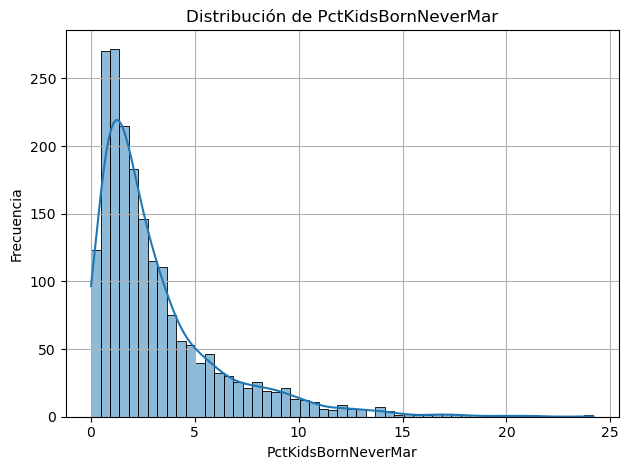

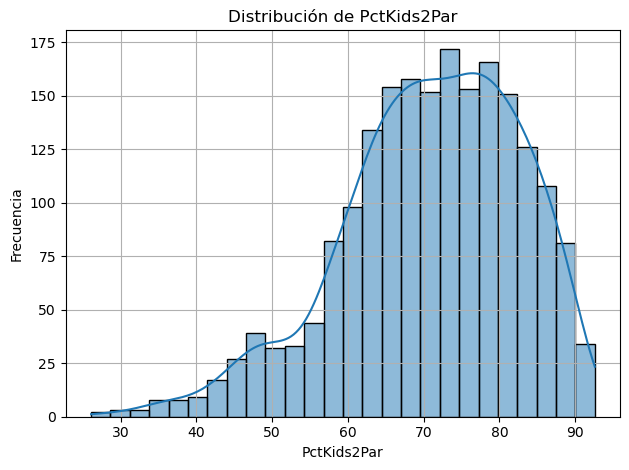

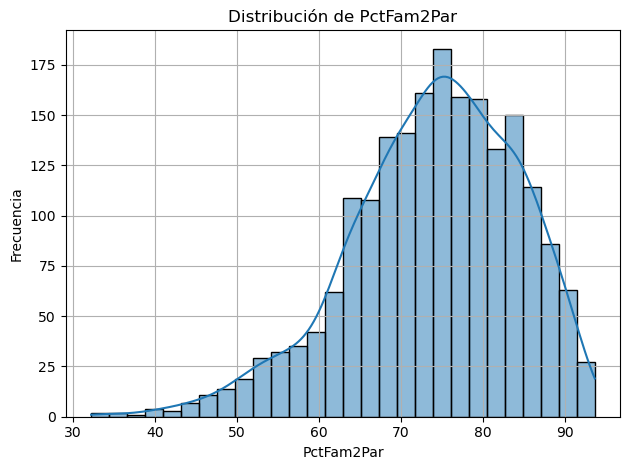

['PctKidsBornNeverMar', 'PctKids2Par', 'PctFam2Par']

In [19]:
correlations = X_clean.corrwith(Y).abs().sort_values(ascending=False)
top3_vars = correlations.head(3).index.tolist()

# Graficar las distribuciones
for var in top3_vars:
    plt.figure()
    sns.histplot(X_clean[var], kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

top3_vars

### Realice un muestreo de entrenamiento y comprobacion, mostrando tanto los resultados del entrenamiento y la comprobación

División del dataset en prueba y entrenamiento

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, Y, test_size=0.3, random_state=42)

Normalización

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Aplicando un modelo de regresión lineal simple pero multivariable, sin regularización

In [28]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**Predicción**

In [29]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

Coeficientes de variables con mas efecto

In [30]:
coef_importance = pd.Series(model.coef_, index=X_clean.columns).sort_values(key=abs, ascending=False)
top2_influential = coef_importance.head(2)
train_score, test_score, top2_influential

(0.6839361792967661,
 0.5985026870875407,
 RentHighQ   -2.221280e+15
 RentLowQ     1.611265e+15
 dtype: float64)

### Conclusión
Precisión de entrenamiento: 68.30%
Precisión en prueba: 59.9%

Variables mas importantes:
- RentHighQ
- RentLowQ

Esto significa que:

- RentHighQ: que en comunidades con mayores costos de vida, hay mejores condiciones económicas o menos tensión social.
- RentLowQ: significa que cuando el alquiler mínimo sube, para los pobres esto significa un problema muy grande, aumentando la tasa de criminalidad